#predicting turbine energy yield (TEY) using ambient variables as features.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving gas_turbines.csv to gas_turbines.csv


In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report
import warnings
from sklearn.preprocessing import OrdinalEncoder
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import pandas as pd
# Read the Excel file
df = pd.read_csv('gas_turbines.csv')
# Display the first few rows of the dataset
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,110.74


# EDA

In [ ]:
# Display the first few rows of the dataset
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72


In [ ]:
# Summary statistics of the numerical columns
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,12.102353,1.972499,68.190934,134.188464
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,1.103196,2.222206,10.470586,15.829717
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,9.904400,0.000388,27.765000,100.170000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,11.622000,0.858055,61.303500,127.985000
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,12.025000,1.390200,66.601000,133.780000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,12.578000,2.160400,73.935500,140.895000
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,15.081000,44.103000,119.890000,174.610000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   CDP     15039 non-null  float64
 8   CO      15039 non-null  float64
 9   NOX     15039 non-null  float64
 10  TEY     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
df.shape

(15039, 11)

In [ ]:
#finding duplicates
df.duplicated().sum()

0

In [ ]:
#finding missing values
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
TEY     0
dtype: int64

#Analysing data

Text(0.5, 1.0, 'Correlation Map')

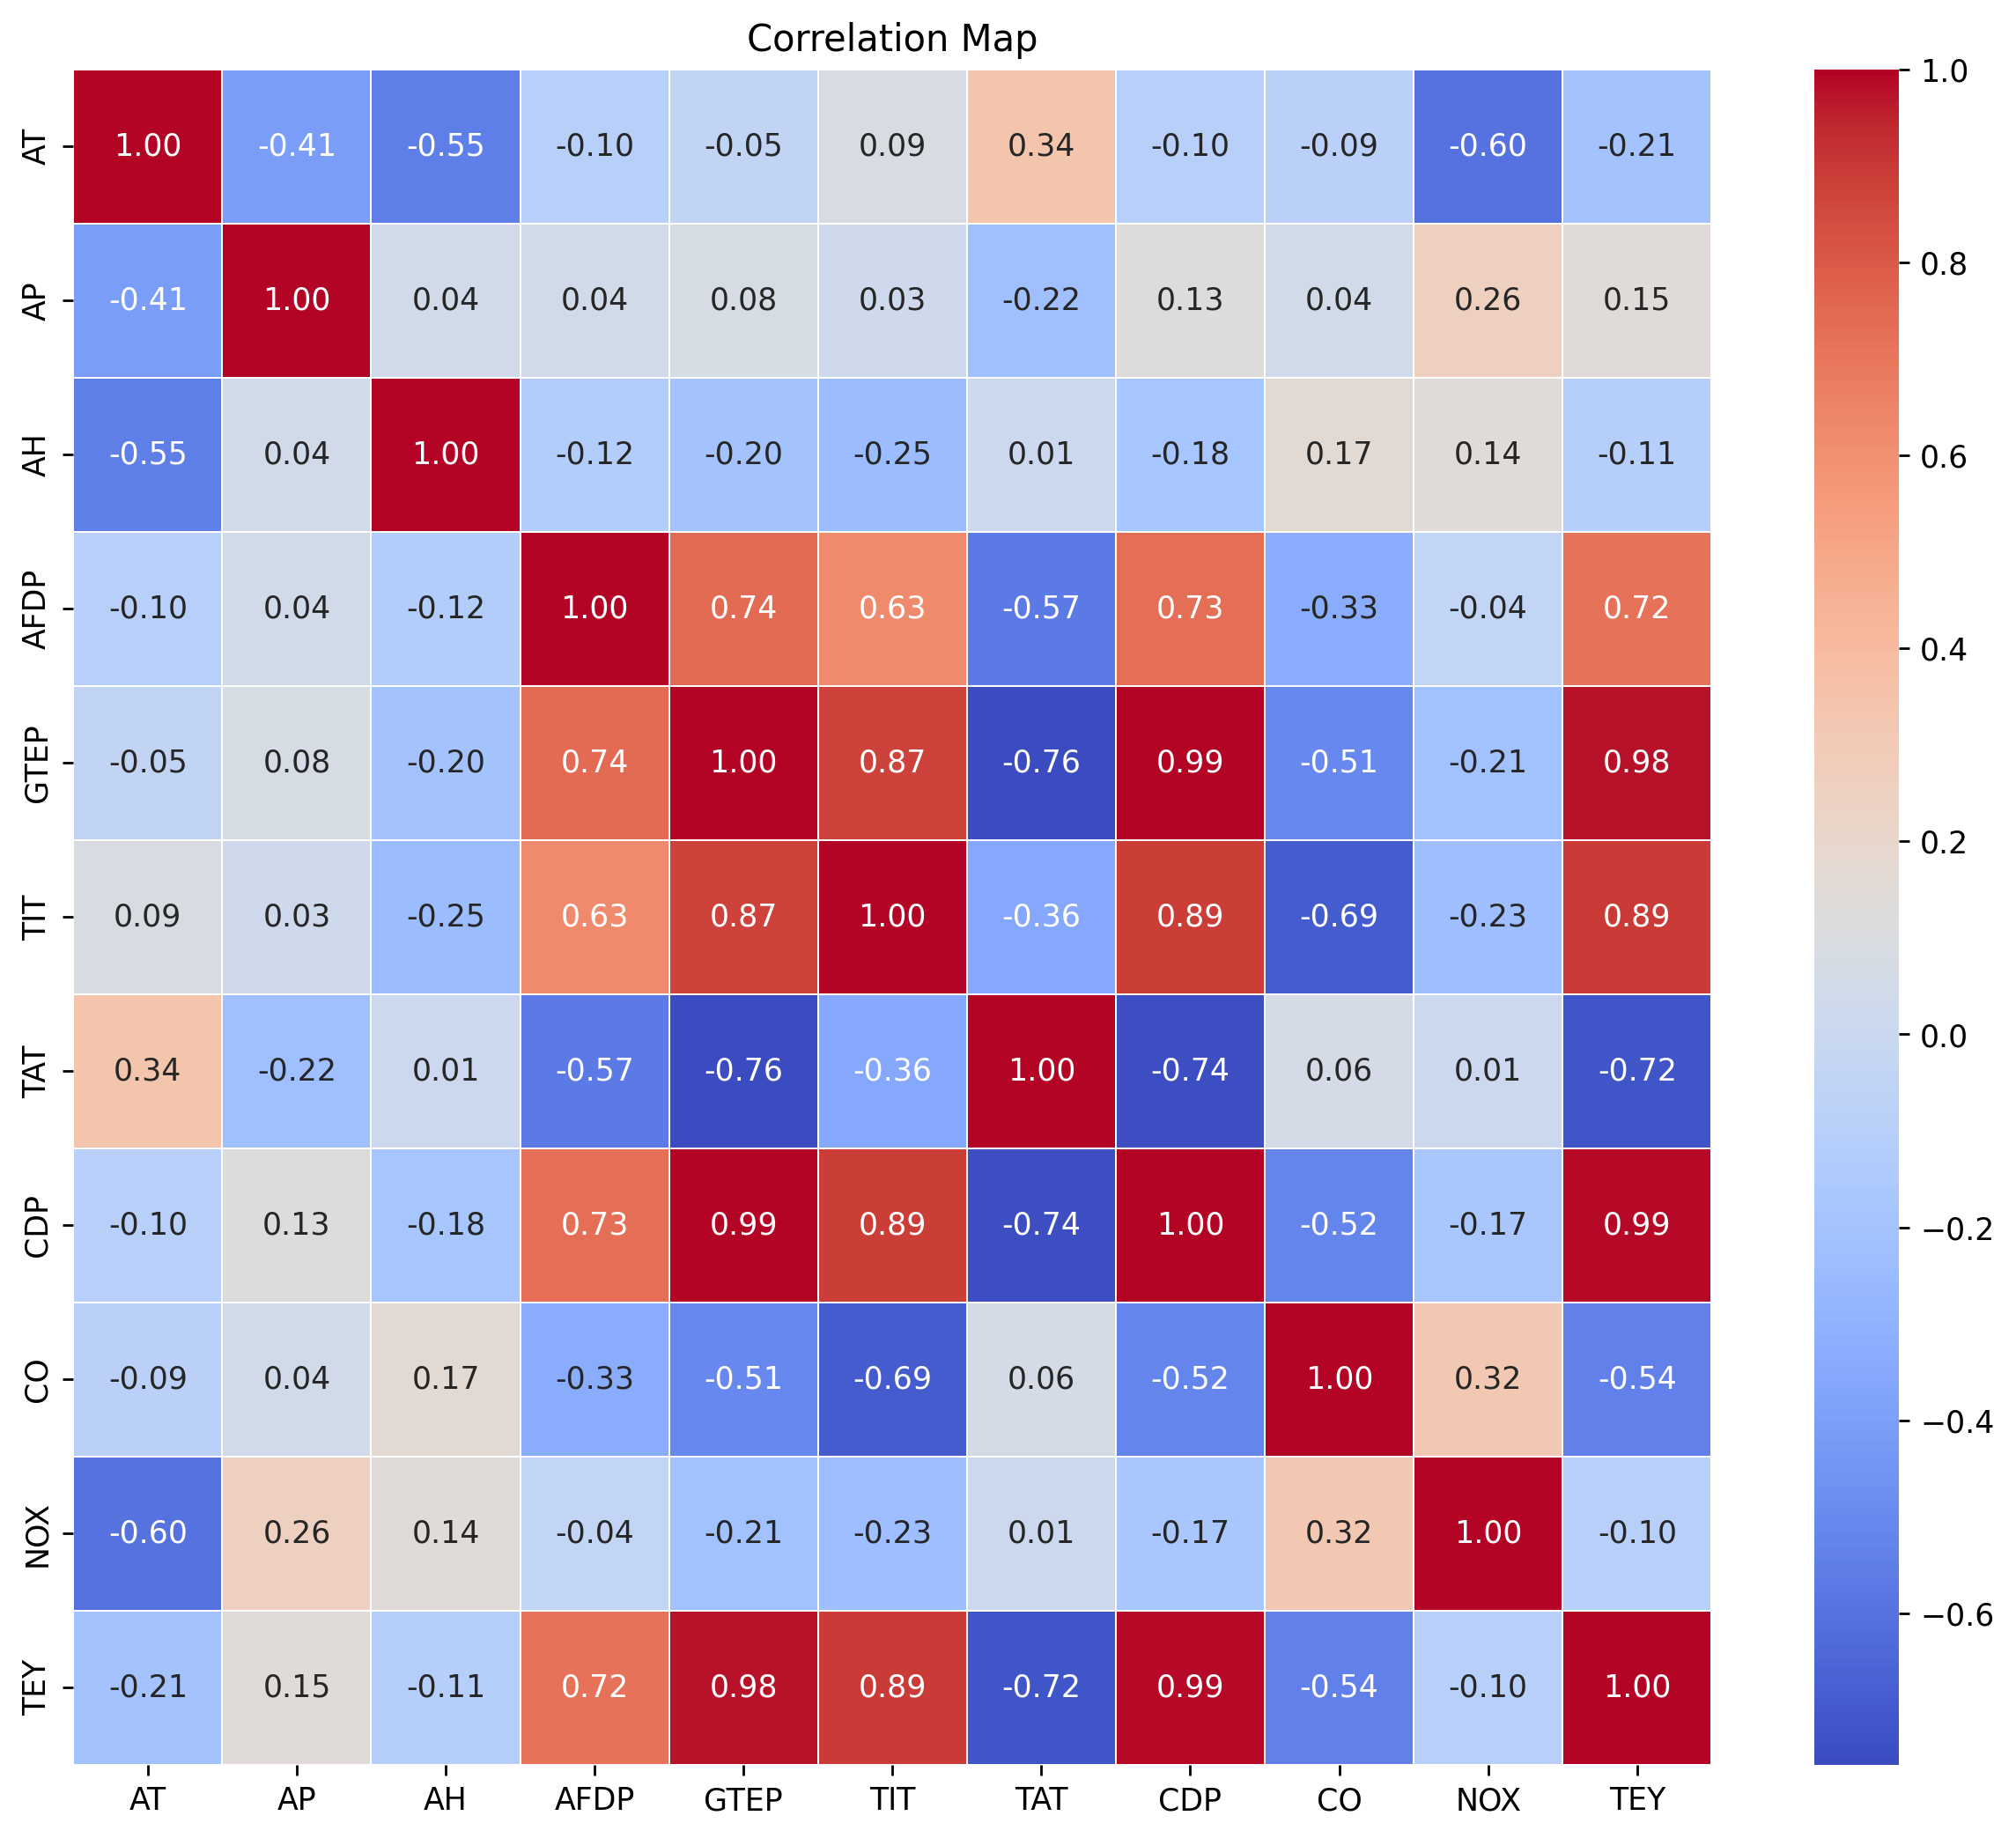

In [ ]:
# Assuming df is your DataFrame containing numerical columns
s = df.select_dtypes(include="number").corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Create a heatmap with a diverging color map and display the correlation coefficients
sns.heatmap(s, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
# Add a title
plt.title("Correlation Map")

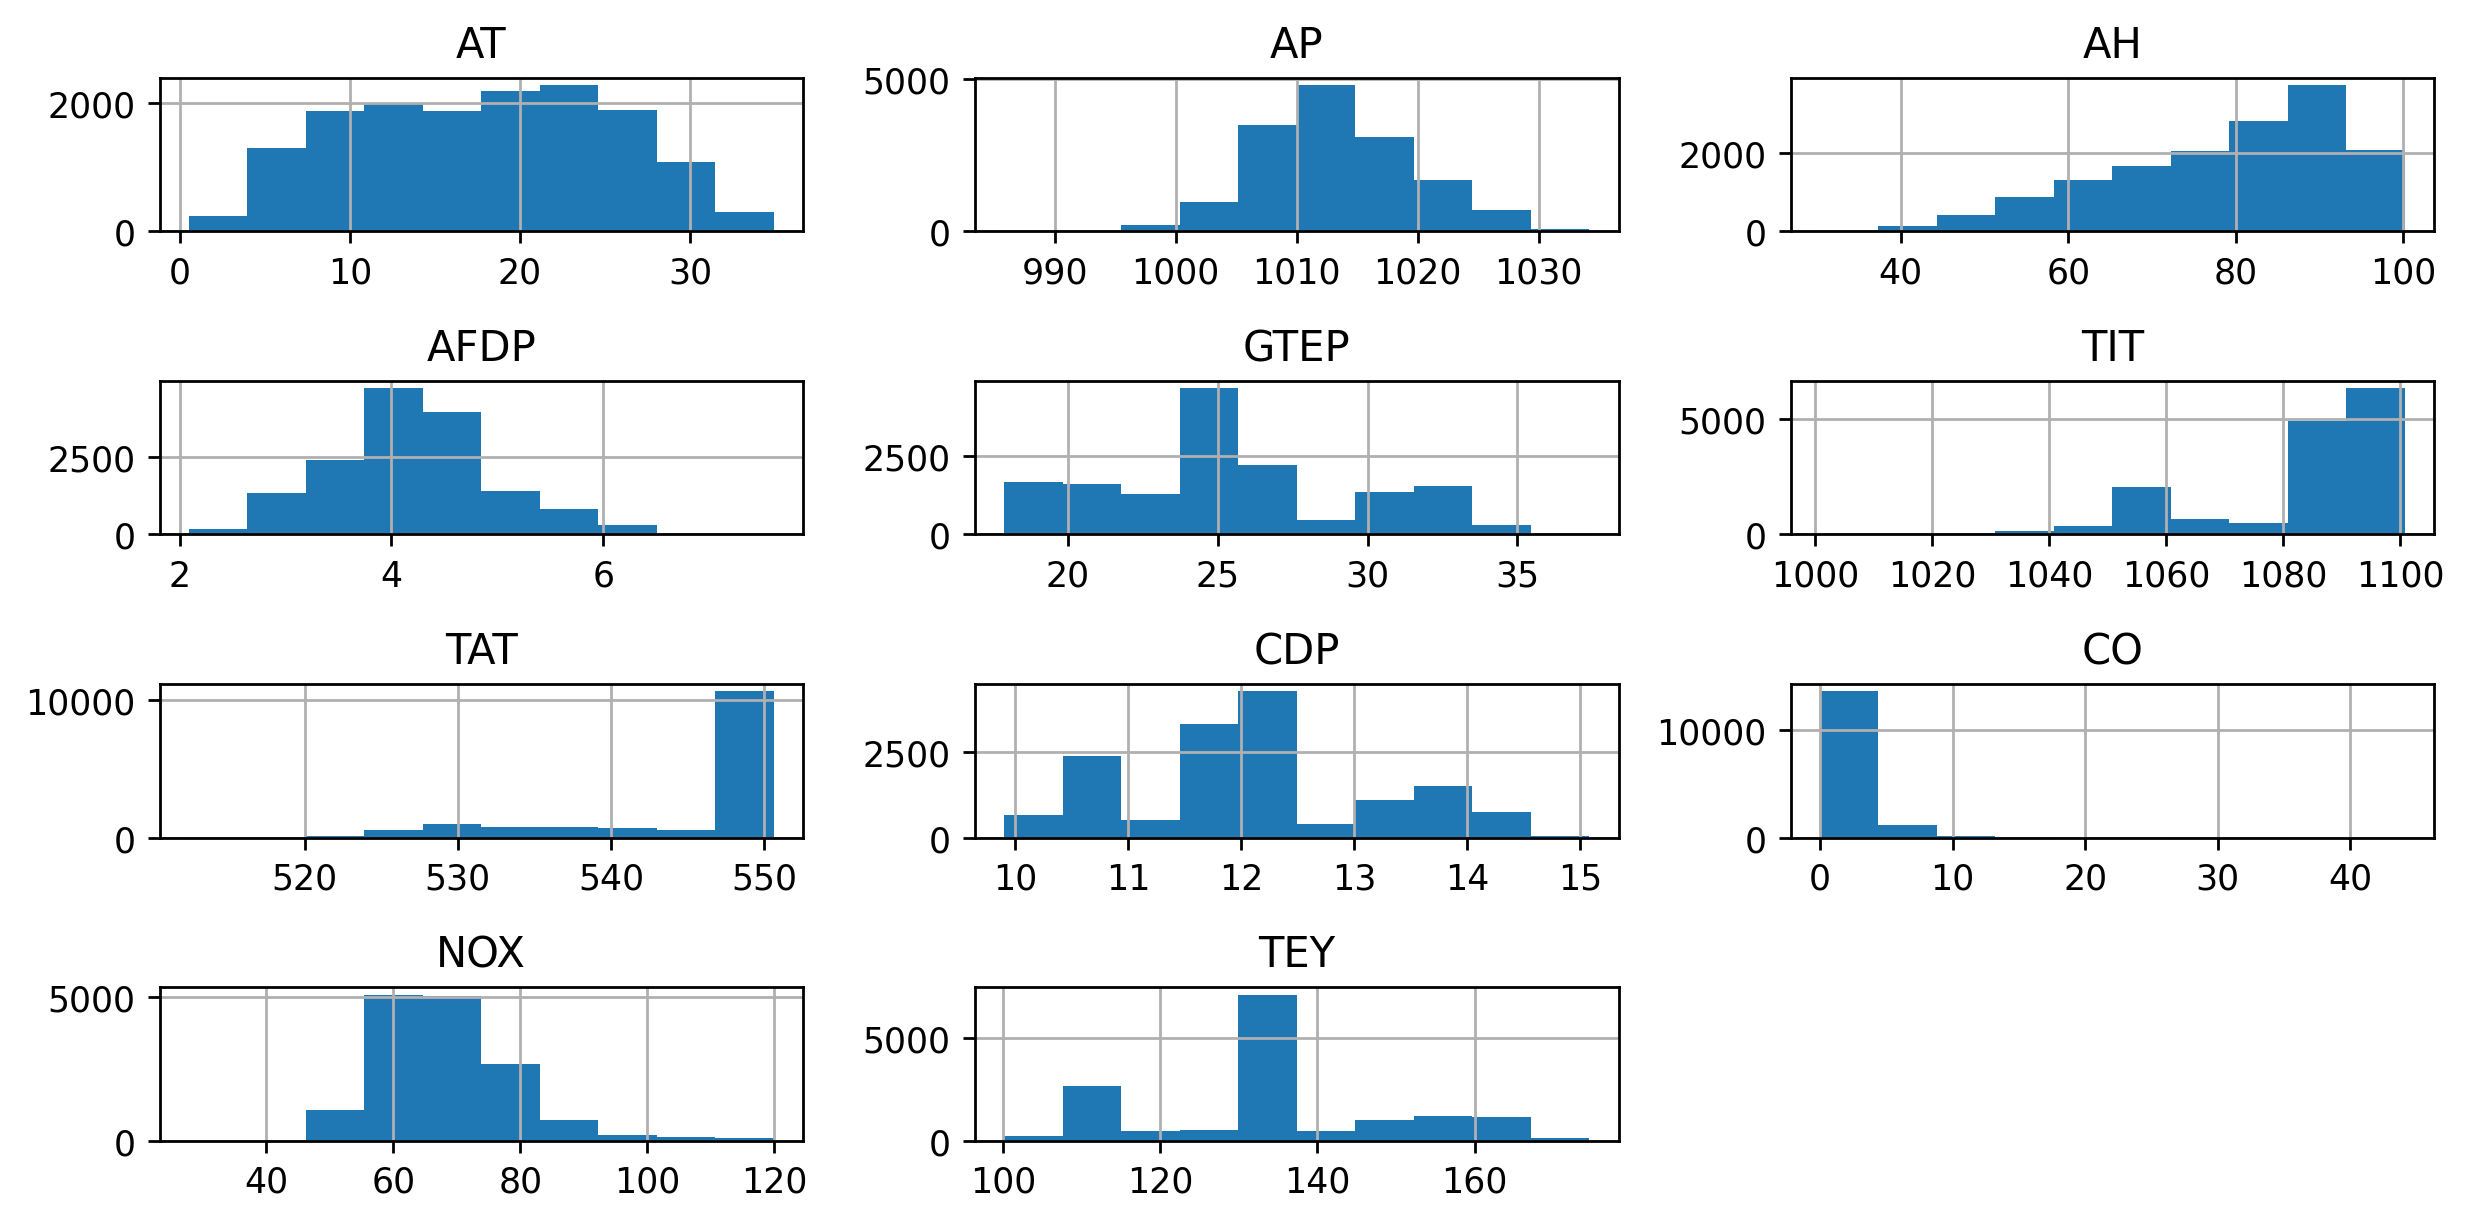

In [ ]:
df.hist()
plt.tight_layout()

In [ ]:
#scatterplot to understand relatinship

In [ ]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#boxplot to identify outliers
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(4,4,1)
sns.boxplot(data[data[ ' ']])



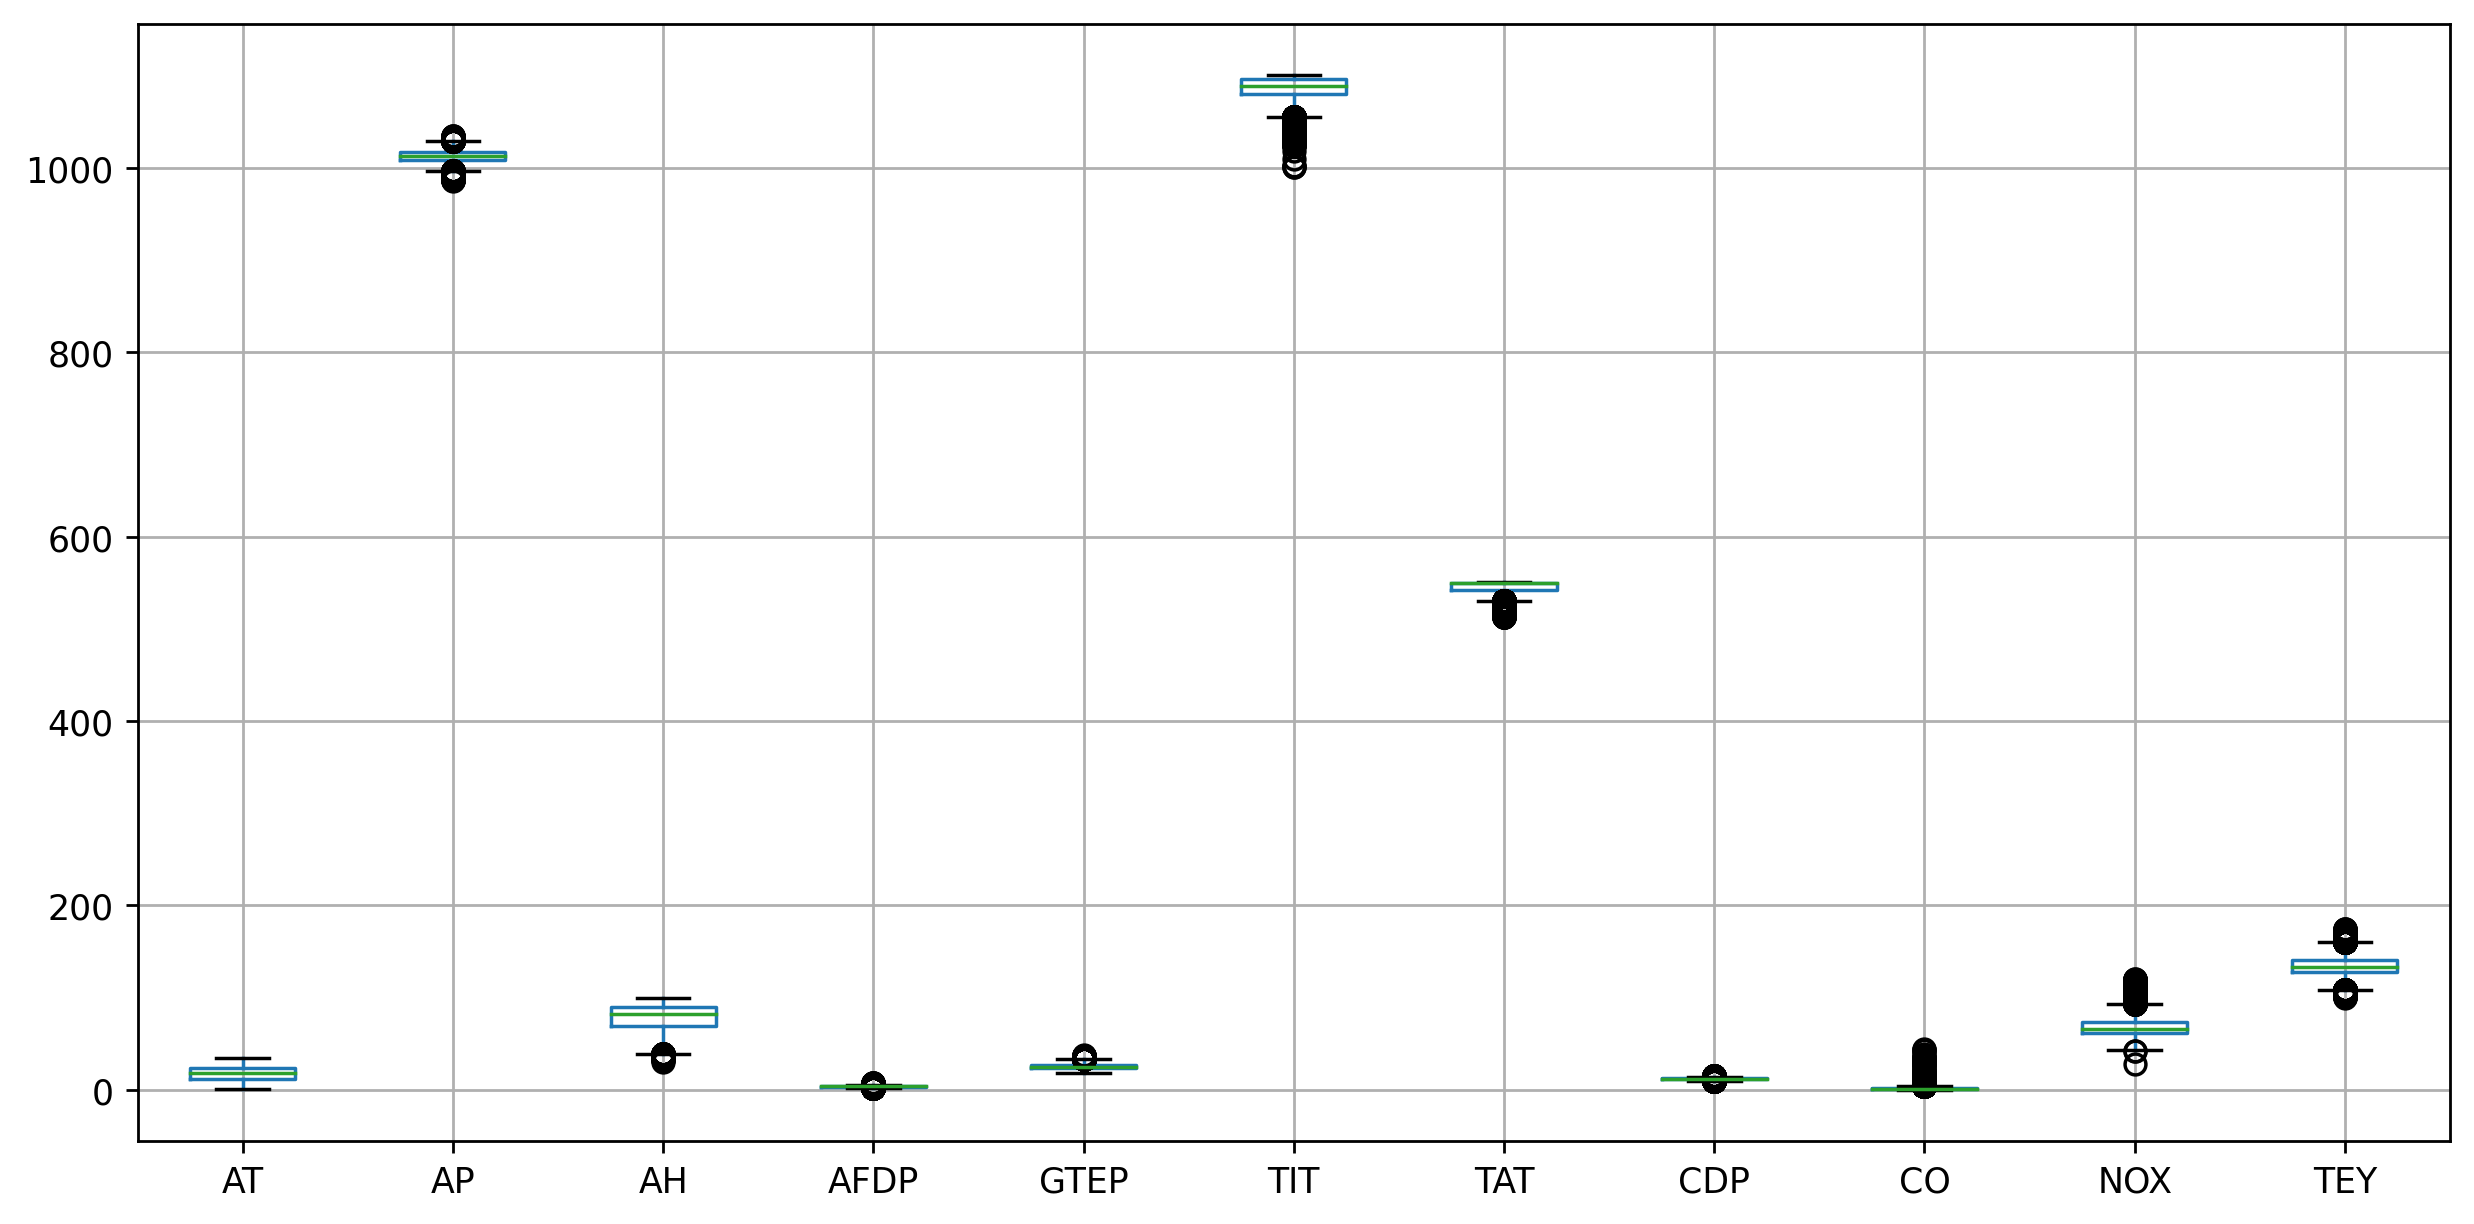

In [ ]:
df.boxplot()
plt.tight_layout()

# for delete outliers

In [ ]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX',
       'TEY'],
      dtype='object')

In [ ]:
import numpy as np
def calculate_whisker(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

# Loop through the list and replace outliers
for i in ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX',
       'TEY']:
    lw, uw = calculate_whisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])

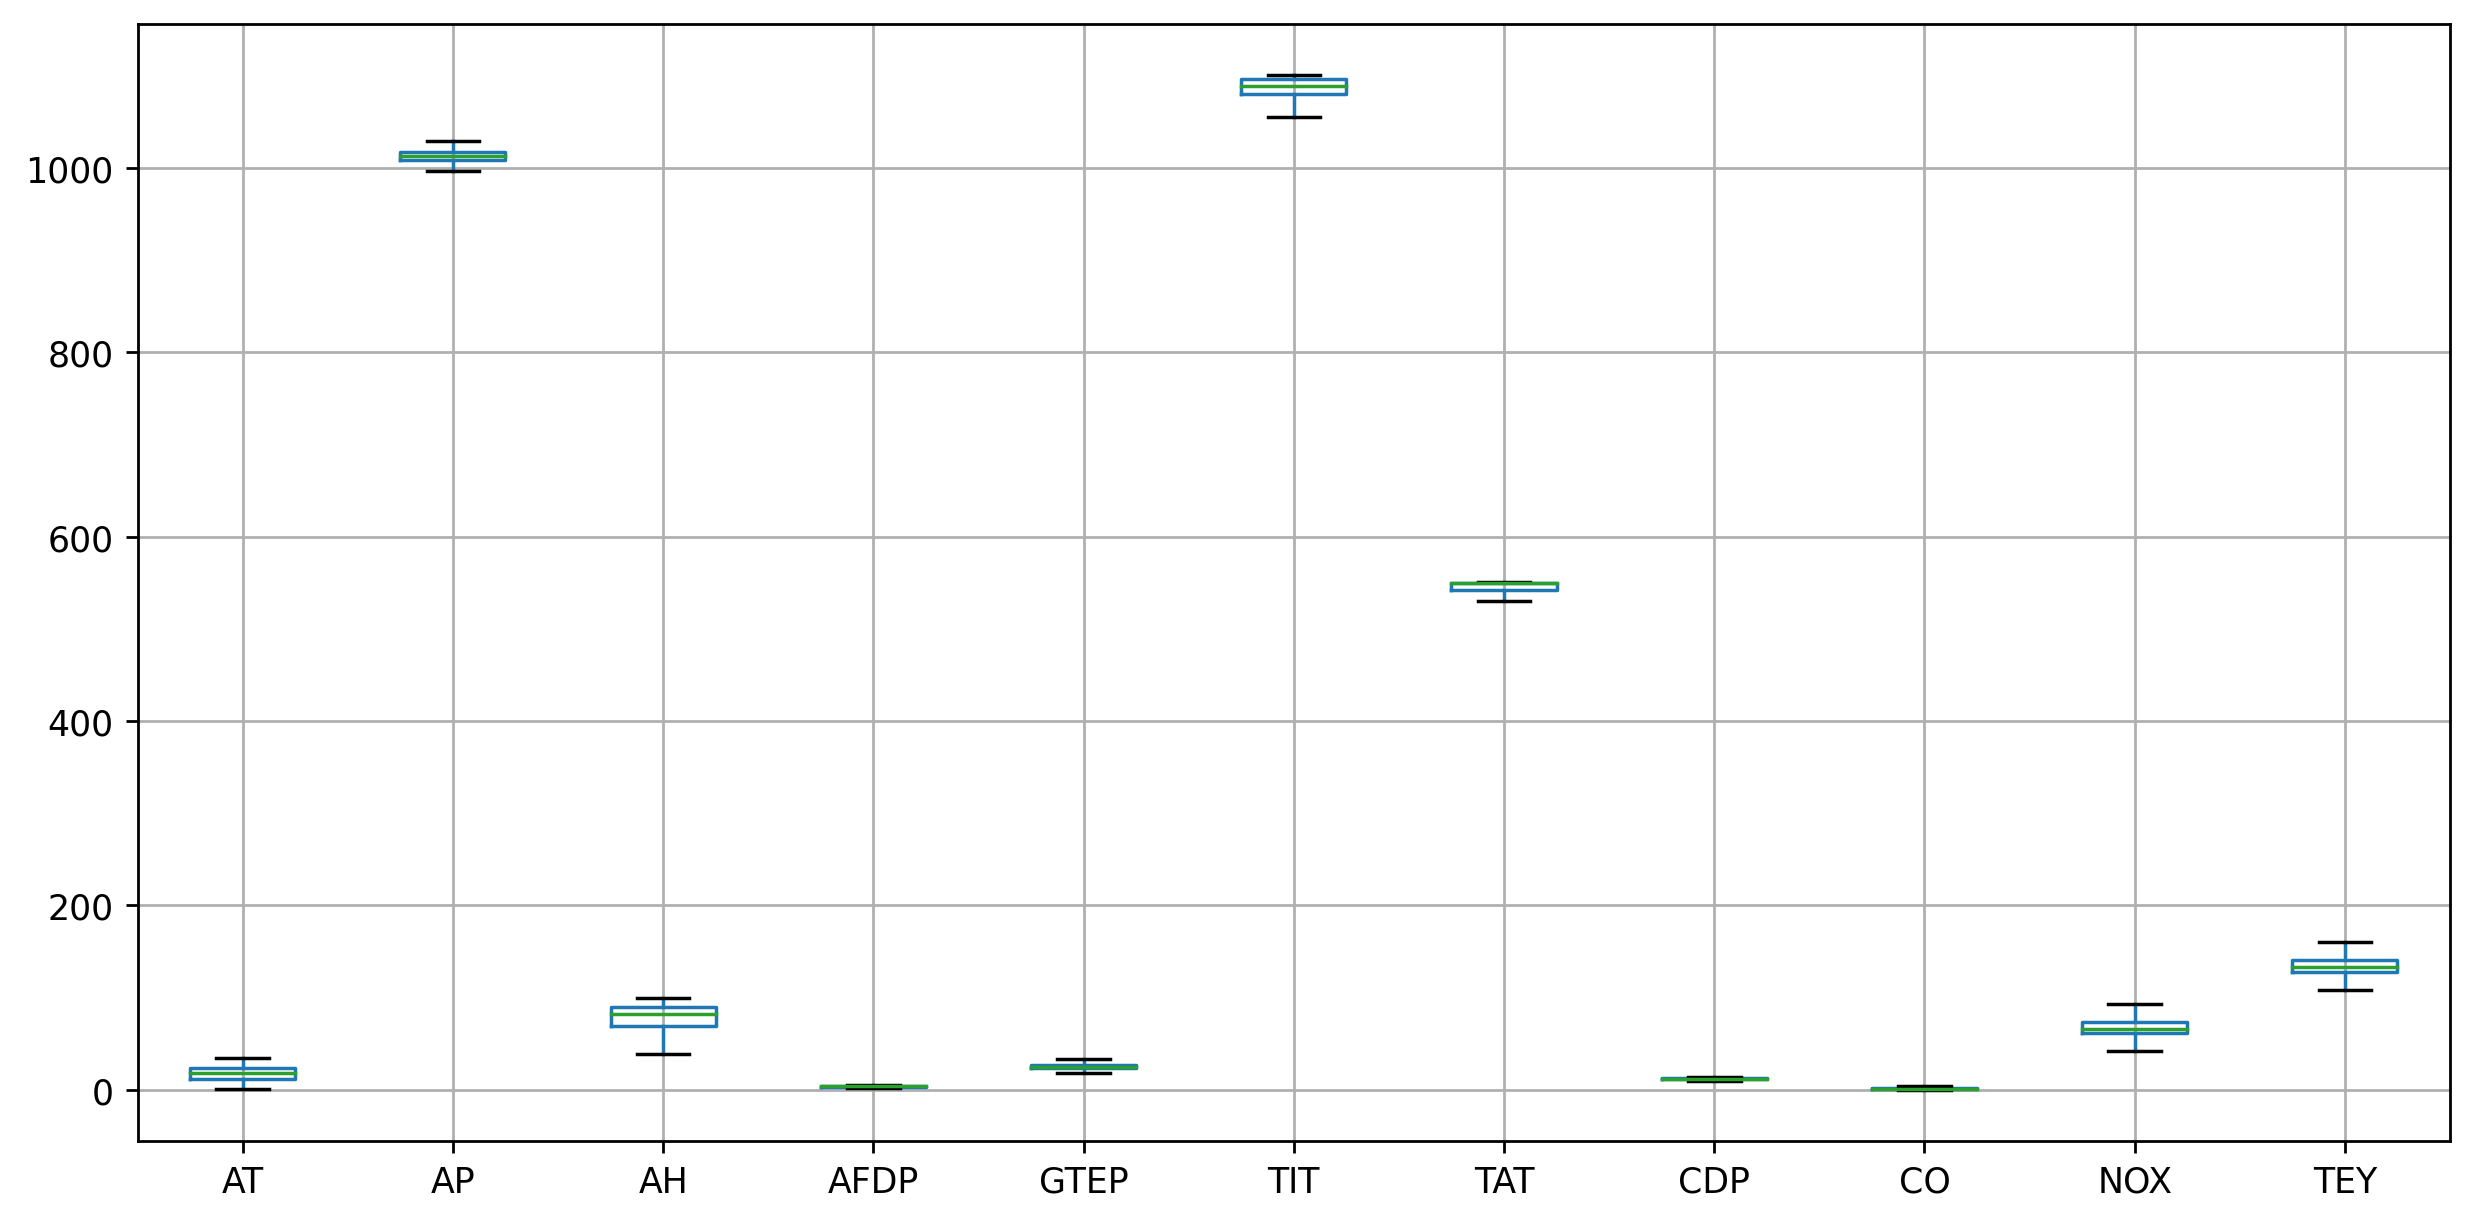

In [ ]:
df.boxplot()
plt.tight_layout()

#model building

In [ ]:
# Define features and target
features = df.drop('TEY', axis=1)
target = df['TEY']

In [ ]:
# Convert target into binary classification (you may need to adjust this based on your problem)
target_binary = (target > target.mean()).astype(int)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_binary, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
301/301 [==============================] - 3s 10ms/step - loss: 0.1530 - accuracy: 0.9316 - val_loss: 0.1575 - val_accuracy: 0.9260
Epoch 2/100
301/301 [==============================] - 3s 9ms/step - loss: 0.1518 - accuracy: 0.9317 - val_loss: 0.1562 - val_accuracy: 0.9290
Epoch 3/100
301/301 [==============================] - 3s 11ms/step - loss: 0.1505 - accuracy: 0.9338 - val_loss: 0.1546 - val_accuracy: 0.9319
Epoch 4/100
301/301 [==============================] - 4s 13ms/step - loss: 0.1511 - accuracy: 0.9337 - val_loss: 0.1548 - val_accuracy: 0.9290
Epoch 5/100
301/301 [==============================] - 1s 4ms/step - loss: 0.1482 - accuracy: 0.9337 - val_loss: 0.1535 - val_accuracy: 0.9327
Epoch 6/100
301/301 [==============================] - 1s 3ms/step - loss: 0.1472 - accuracy: 0.9340 - val_loss: 0.1525 - val_accuracy: 0.9310
Epoch 7/100
301/301 [==============================] - 1s 3ms/step - loss: 0.1475 - accuracy: 0.9353 - val_loss: 0.1514 - val_accuracy: 0.9

In [ ]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

94/94 [==============================] - 0s 1ms/step
Accuracy: 94.15%


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1770
           1       0.95      0.90      0.93      1238

    accuracy                           0.94      3008
   macro avg       0.94      0.94      0.94      3008
weighted avg       0.94      0.94      0.94      3008



In [26]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained your model on X_train and y_train
# y_train_pred should be the predictions on the training set
y_train_pred = (model.predict(X_train) > 0.5).astype(int)
training_accuracy = accuracy_score(y_train, y_train_pred)

# Now, evaluate the testing accuracy as you did before
y_test_pred = (model.predict(X_test) > 0.5).astype(int)
testing_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {training_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {testing_accuracy * 100:.2f}%")

94/94 [==============================] - 0s 3ms/step
Training Accuracy: 94.89%
Testing Accuracy: 94.75%
